In [333]:
import pandas as pd

In [334]:
dataset = pd.read_csv('apartmentsdata.csv')

In [335]:
dataset.head()

,area,city,floor,location,price,rooms,source,square_price,title,Unnamed: 9,Unnamed: 10
0,76,Beograd,3,"Opština Vračar , Hram svetog Save , Svetog Save",290000,2.0,halooglasi,3816,"Plato Hrama Svetog Save, Vračar, 76m2",NaN,NaN
1,41,Vrnjačka Banja,2,"Gradska lokacija , Raj , Kosovska br.1",82000,2.0,halooglasi,2000,Lux stan Akva Park Raj,NaN,NaN
2,37,Sokobanja,1,"Gradska lokacija , Banjica , Profesora Dragol...",60605,2.0,halooglasi,1650,Direktna prodaja stana u Sokobanji,NaN,NaN
3,34,Sokobanja,3,"Gradska lokacija , Banjica , Profesora Dragol...",59488,1.5,halooglasi,1760,Direktna prodaja stana Sokobanja,NaN,NaN
4,55,Beograd,2,"Opština Zemun , Altina , Ugrinovački put 8. deo",104500,2.0,halooglasi,1900,"Zemun, Altina, 2.0",NaN,NaN


In [336]:
for i,loc in enumerate(dataset['location']):
    print(loc)
    if i==5:
        break

 Opština Vračar , Hram svetog Save , Svetog Save 
 Gradska lokacija , Raj , Kosovska br.1 
 Gradska lokacija , Banjica , Profesora Dragoljuba Jovanovića 
 Gradska lokacija , Banjica , Profesora Dragoljuba Jovanovića 
 Opština Zemun , Altina , Ugrinovački put 8. deo 
 Okolno mesto , Brzeće , Mramorska88 


In [337]:
location_split = dataset['location'].str.split(',', expand=True)

In [338]:
dataset['opstina'] = location_split[0].str.strip() 
dataset['naselje'] = location_split[1].str.strip()
dataset['ulica'] = location_split[2].str.strip()

dataset[['location', 'opstina', 'naselje', 'ulica']].head()

,location,opstina,naselje,ulica
0,"Opština Vračar , Hram svetog Save , Svetog Save",Opština Vračar,Hram svetog Save,Svetog Save
1,"Gradska lokacija , Raj , Kosovska br.1",Gradska lokacija,Raj,Kosovska br.1
2,"Gradska lokacija , Banjica , Profesora Dragol...",Gradska lokacija,Banjica,Profesora Dragoljuba Jovanovića
3,"Gradska lokacija , Banjica , Profesora Dragol...",Gradska lokacija,Banjica,Profesora Dragoljuba Jovanovića
4,"Opština Zemun , Altina , Ugrinovački put 8. deo",Opština Zemun,Altina,Ugrinovački put 8. deo


In [339]:
dataset.drop(['Unnamed: 9', 'Unnamed: 10'], axis=1, inplace=True)

In [340]:
dataset.rename(columns={
    'opstina': 'municipality',
    'naselje': 'neighborhood',
    'ulica': 'street'
}, inplace=True)

In [341]:
dataset.head()

,area,city,floor,location,price,rooms,source,square_price,title,municipality,neighborhood,street
0,76,Beograd,3,"Opština Vračar , Hram svetog Save , Svetog Save",290000,2.0,halooglasi,3816,"Plato Hrama Svetog Save, Vračar, 76m2",Opština Vračar,Hram svetog Save,Svetog Save
1,41,Vrnjačka Banja,2,"Gradska lokacija , Raj , Kosovska br.1",82000,2.0,halooglasi,2000,Lux stan Akva Park Raj,Gradska lokacija,Raj,Kosovska br.1
2,37,Sokobanja,1,"Gradska lokacija , Banjica , Profesora Dragol...",60605,2.0,halooglasi,1650,Direktna prodaja stana u Sokobanji,Gradska lokacija,Banjica,Profesora Dragoljuba Jovanovića
3,34,Sokobanja,3,"Gradska lokacija , Banjica , Profesora Dragol...",59488,1.5,halooglasi,1760,Direktna prodaja stana Sokobanja,Gradska lokacija,Banjica,Profesora Dragoljuba Jovanovića
4,55,Beograd,2,"Opština Zemun , Altina , Ugrinovački put 8. deo",104500,2.0,halooglasi,1900,"Zemun, Altina, 2.0",Opština Zemun,Altina,Ugrinovački put 8. deo


In [342]:
dataset.drop('location', axis=1, inplace=True)

In [343]:
# we don't need title and source, so we can drop them
dataset.drop(['title', 'source'], axis=1, inplace=True)

In [344]:
dataset.head()

,area,city,floor,price,rooms,square_price,municipality,neighborhood,street
0,76,Beograd,3,290000,2.0,3816,Opština Vračar,Hram svetog Save,Svetog Save
1,41,Vrnjačka Banja,2,82000,2.0,2000,Gradska lokacija,Raj,Kosovska br.1
2,37,Sokobanja,1,60605,2.0,1650,Gradska lokacija,Banjica,Profesora Dragoljuba Jovanovića
3,34,Sokobanja,3,59488,1.5,1760,Gradska lokacija,Banjica,Profesora Dragoljuba Jovanovića
4,55,Beograd,2,104500,2.0,1900,Opština Zemun,Altina,Ugrinovački put 8. deo


In [345]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11704 entries, 0 to 11703
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          11704 non-null  int64  
 1   city          11704 non-null  object 
 2   floor         11586 non-null  object 
 3   price         11704 non-null  int64  
 4   rooms         11704 non-null  float64
 5   square_price  11704 non-null  int64  
 6   municipality  11704 non-null  object 
 7   neighborhood  11265 non-null  object 
 8   street        8967 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 823.1+ KB


In [346]:
for col in dataset.columns:
    if dataset[col].isna().any():
        print(col)

floor
neighborhood
street


In [347]:
# NaN values in column neighborhood can be replaced with values in municipality
dataset['neighborhood'] = dataset['neighborhood'].fillna(dataset['municipality'])

In [348]:
dataset['floor'].unique()

array(['3', '2', '1', '4', '0', '9', '6', '5', '0.5', '11', 'p', '7',
       '15', '-0.5', '8', '16', '10', '17', '25', '18', '12', '14', '23',
       '29', '27', '13', '19', '26', '20', '24', '22', nan], dtype=object)

In [349]:
dataset['floor'] = dataset['floor'].replace('p', 0)
dataset['floor'] = dataset['floor'].astype(float).abs()

In [350]:
for i, (city, group) in enumerate(dataset.groupby('neighborhood')['floor']):
    if i==3:
        break
    print("=" * 40)
    print(f"Grad: {city} ({len(group)} redova)")
    print("=" * 40)
    print(group.to_string(index=False))

Grad: 25. maj (8 redova)
0.5
0.0
1.0
0.0
1.0
0.0
6.0
1.0
Grad: 27. marta (4 redova)
5.0
6.0
0.0
6.0
Grad: 4. juli (3 redova)
1.0
0.0
0.0


In [351]:
dataset['neighborhood'].isna().any()

np.False_

In [352]:
city_median_floor = dataset.groupby('city')['floor'].transform('median')

def fill_floor(x):
    if x.notna().any():
        return x.fillna(x.median())
    else:
        return x.fillna(city_median_floor[x.index])

dataset['floor'] = dataset.groupby('neighborhood')['floor'].transform(fill_floor)

In [353]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11704 entries, 0 to 11703
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          11704 non-null  int64  
 1   city          11704 non-null  object 
 2   floor         11704 non-null  float64
 3   price         11704 non-null  int64  
 4   rooms         11704 non-null  float64
 5   square_price  11704 non-null  int64  
 6   municipality  11704 non-null  object 
 7   neighborhood  11704 non-null  object 
 8   street        8967 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 823.1+ KB


In [354]:
dataset.drop('street', axis=1, inplace=True)

In [355]:
dataset.head()

,area,city,floor,price,rooms,square_price,municipality,neighborhood
0,76,Beograd,3.0,290000,2.0,3816,Opština Vračar,Hram svetog Save
1,41,Vrnjačka Banja,2.0,82000,2.0,2000,Gradska lokacija,Raj
2,37,Sokobanja,1.0,60605,2.0,1650,Gradska lokacija,Banjica
3,34,Sokobanja,3.0,59488,1.5,1760,Gradska lokacija,Banjica
4,55,Beograd,2.0,104500,2.0,1900,Opština Zemun,Altina


In [356]:
# OUTLIERS

In [357]:
numeric_cols = ['area', 'floor', 'price', 'rooms', 'square_price']

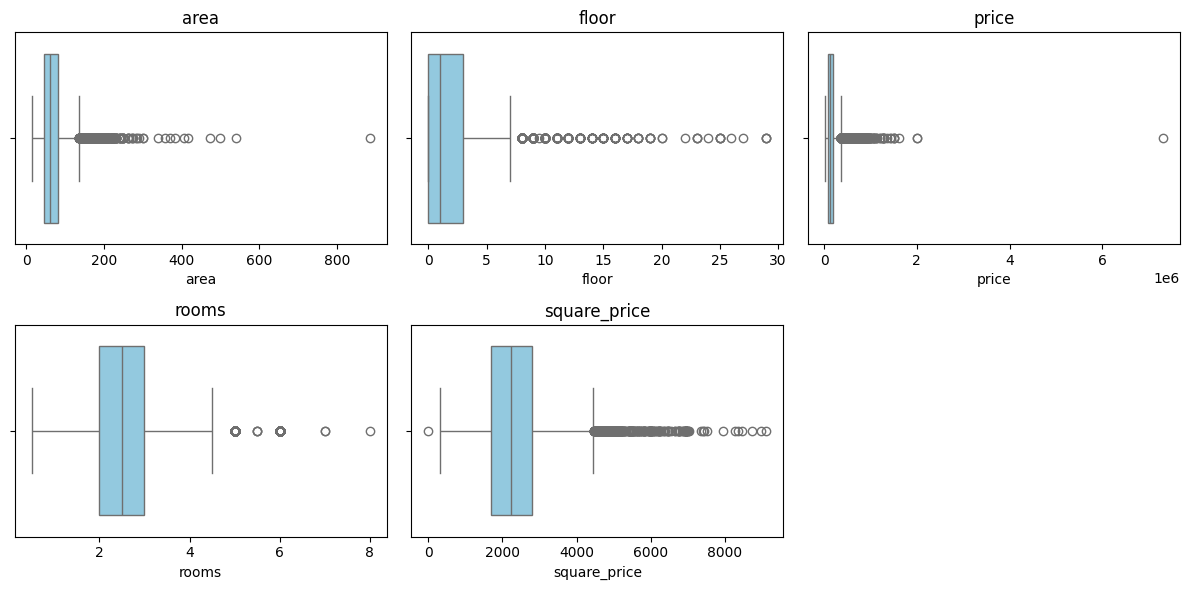

In [358]:
import matplotlib.pyplot as plt
import seaborn as sns

df = dataset
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

In [359]:
import pandas as pd

df = dataset
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"Column: {col}")
    print(f"  Q1 = {Q1:.2f}")
    print(f"  Q3 = {Q3:.2f}")
    print(f"  IQR = {IQR:.2f}")
    print(f"  Lower bound (outlier <) = {lower_bound:.2f}")
    print(f"  Upper bound (outlier >) = {upper_bound:.2f}")
    print(f"  Outliers number: {(df[col] < lower_bound).sum() + (df[col] > upper_bound).sum()}")

Column: area
  Q1 = 45.00
  Q3 = 81.00
  IQR = 36.00
  Lower bound (outlier <) = -9.00
  Upper bound (outlier >) = 135.00
  Outliers number: 446
Column: floor
  Q1 = 0.00
  Q3 = 3.00
  IQR = 3.00
  Lower bound (outlier <) = -4.50
  Upper bound (outlier >) = 7.50
  Outliers number: 418
Column: price
  Q1 = 88320.00
  Q3 = 197000.00
  IQR = 108680.00
  Lower bound (outlier <) = -74700.00
  Upper bound (outlier >) = 360020.00
  Outliers number: 694
Column: rooms
  Q1 = 2.00
  Q3 = 3.00
  IQR = 1.00
  Lower bound (outlier <) = 0.50
  Upper bound (outlier >) = 4.50
  Outliers number: 342
Column: square_price
  Q1 = 1702.75
  Q3 = 2805.25
  IQR = 1102.50
  Lower bound (outlier <) = 49.00
  Upper bound (outlier >) = 4459.00
  Outliers number: 407


In [360]:
# There is a lot of outliers, so lets check if its normal for their neighborhood

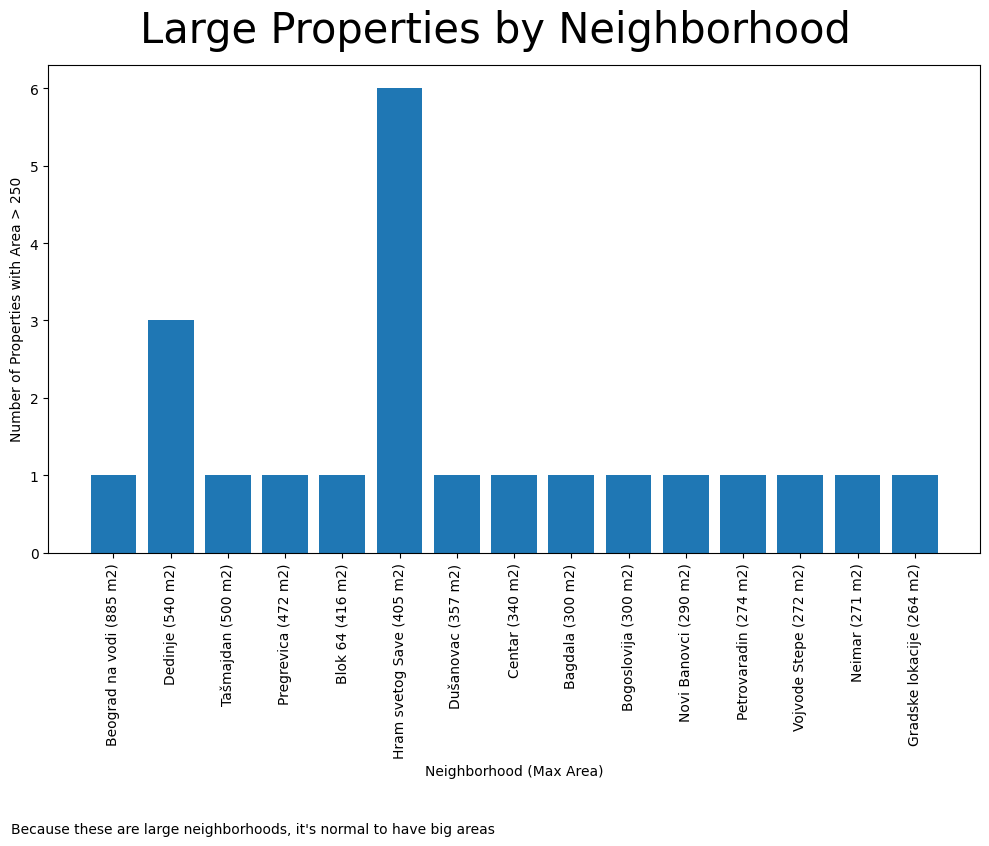

In [361]:
df_filtered = dataset[dataset['area'] > 250]

counts = df_filtered['neighborhood'].value_counts()

max_area = df_filtered.groupby('neighborhood')['area'].max()

combined = pd.DataFrame({
    'count': counts,
    'max_area': max_area
}).sort_values('max_area', ascending=False)

labels = [f"{n} ({int(a)} m2)" for n, a in zip(combined.index, combined['max_area'])]

plt.figure(figsize=(10, 8))
plt.bar(labels, combined['count'])
plt.xticks(rotation=90)
plt.xlabel('Neighborhood (Max Area)')
plt.ylabel('Number of Properties with Area > 250')
plt.suptitle('Large Properties by Neighborhood', fontsize=30)
plt.figtext(0.5, -0.05, "Because these are large neighborhoods, it's normal to have big areas",
            wrap=True, horizontalalignment='right', fontsize=10)
plt.tight_layout()
plt.show()

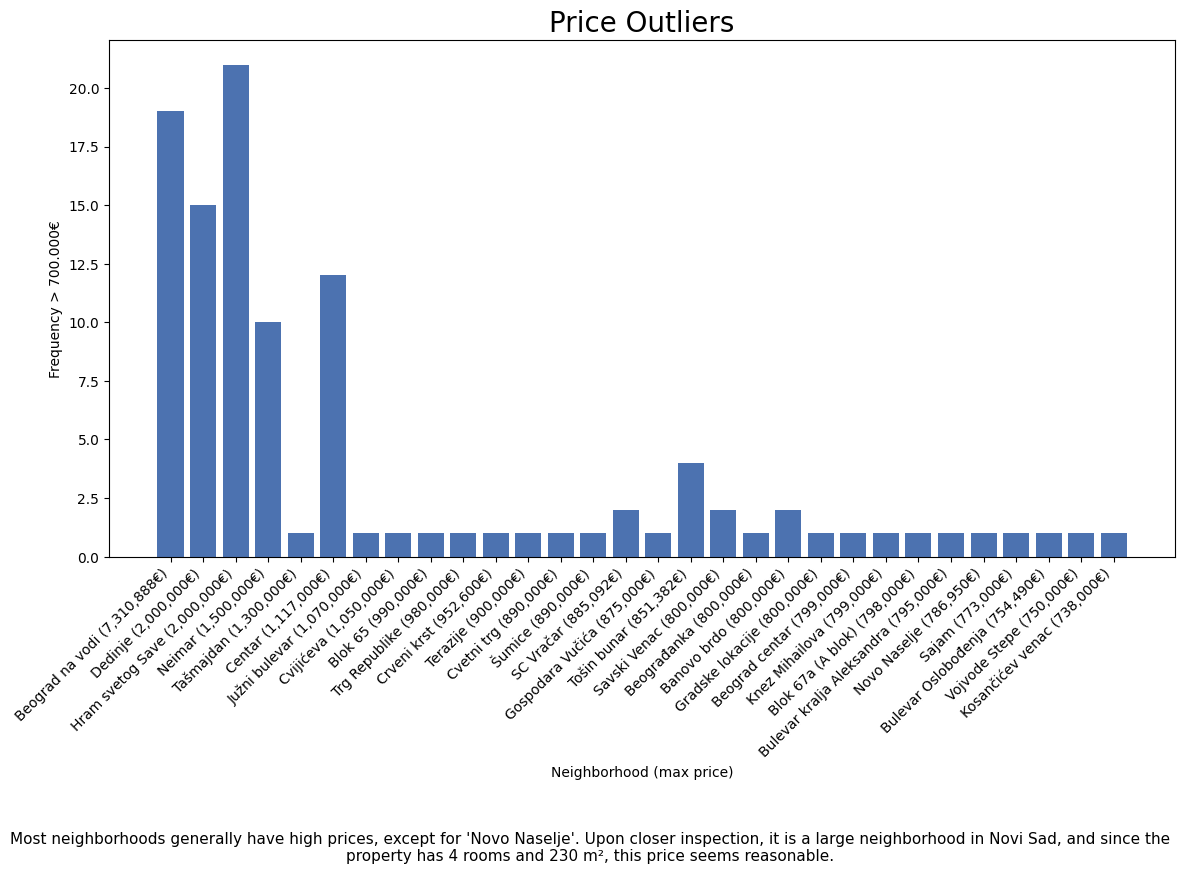

In [362]:
df_filtered = dataset[dataset['price'] > 700000]

counts = df_filtered['neighborhood'].value_counts()

max_price = df_filtered.groupby('neighborhood')['price'].max()

combined = pd.DataFrame({
    'count': counts,
    'max_price': max_price
}).sort_values('max_price', ascending=False)

labels = [f"{n} ({int(p):,}€)" for n, p in zip(combined.index, combined['max_price'])]

plt.figure(figsize=(12,8))
plt.bar(labels, combined['count'], color="#4c72b0")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Neighborhood (max price)')
plt.ylabel('Frequency > 700.000€')
plt.title('Price Outliers', fontsize=20)

text = ("Most neighborhoods generally have high prices, except for 'Novo Naselje'. "
        "Upon closer inspection, it is a large neighborhood in Novi Sad, "
        "and since the property has 4 rooms and 230 m², this price seems reasonable.")

plt.figtext(0.5, -0.08, text, wrap=True, horizontalalignment='center', fontsize=11)
plt.tight_layout()
plt.show()

In [363]:
dataset[dataset['neighborhood'] == 'Novo Naselje']

,area,city,floor,price,rooms,square_price,municipality,neighborhood
72,121,Novi Sad,1.0,786950,4.0,6504,Opština Novi Sad,Novo Naselje
1580,53,Novi Sad,2.0,103000,2.5,1943,Opština Novi Sad,Novo Naselje
1713,40,Novi Sad,0.0,76500,1.5,1912,Opština Novi Sad,Novo Naselje
1881,55,Novi Sad,1.0,105060,2.0,1910,Opština Novi Sad,Novo Naselje
1890,43,Novi Sad,1.0,98880,1.5,2300,Opština Novi Sad,Novo Naselje
...,...,...,...,...,...,...,...,...
9756,42,Novi Sad,1.0,95864,2.0,2282,Opština Novi Sad,Novo Naselje
9940,30,Novi Sad,6.0,81000,0.5,2700,Bistrica,Novo Naselje
10120,55,Novi Sad,6.0,110000,2.5,2000,Bistrica,Novo Naselje
10361,58,Novi Sad,1.0,315000,3.0,3539,Satelit,Novo Naselje


In [364]:
dataset[(dataset['neighborhood'] == 'Bubanj') & (dataset['rooms'] > 2)]

,area,city,floor,price,rooms,square_price,municipality,neighborhood
3892,70,Niš,0.0,108100,2.5,1547,Palilula,Bubanj
3905,58,Niš,0.0,89420,2.5,1547,Palilula,Bubanj
3983,93,Niš,0.0,72000,3.5,774,Palilula,Bubanj
4028,58,Niš,0.0,95000,2.5,1638,Palilula,Bubanj
4115,59,Niš,1.0,65000,4.0,1102,Palilula,Bubanj
5006,64,Kragujevac,6.0,120000,3.0,1875,Gradska lokacija,Bubanj
5377,63,Kragujevac,4.0,90828,3.0,1450,Gradska lokacija,Bubanj
5378,60,Kragujevac,5.0,86188,3.0,1450,Gradska lokacija,Bubanj
5944,68,Kragujevac,5.0,90860,3.0,1350,Gradska lokacija,Bubanj
5945,66,Kragujevac,4.0,88930,3.0,1350,Gradska lokacija,Bubanj


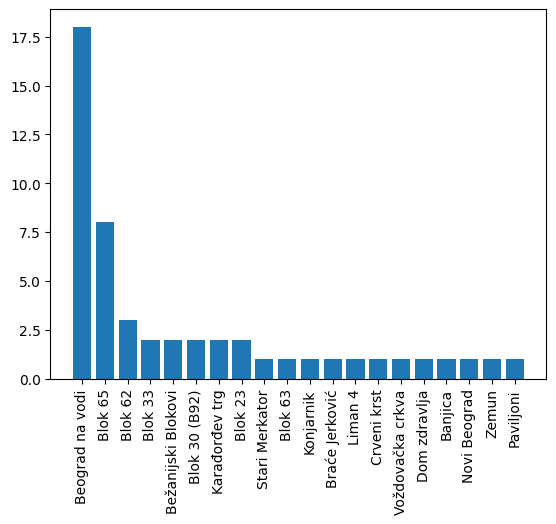

In [365]:
counts = dataset[dataset['floor'] > 15]['neighborhood'].value_counts()

plt.bar(counts.index, counts.values)
plt.xticks(rotation= 90)
plt.show()

In [366]:
def hist_col(col):
    plt.figure(figsize=(10,8))
    
    _, bins, _ = plt.hist(dataset[col], bins=50, edgecolor='black')
    
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    
    plt.xticks(bin_centers, [f"{int(x):,}" for x in bin_centers], rotation=90)
    
    plt.title(f'{col}', fontsize=20)
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

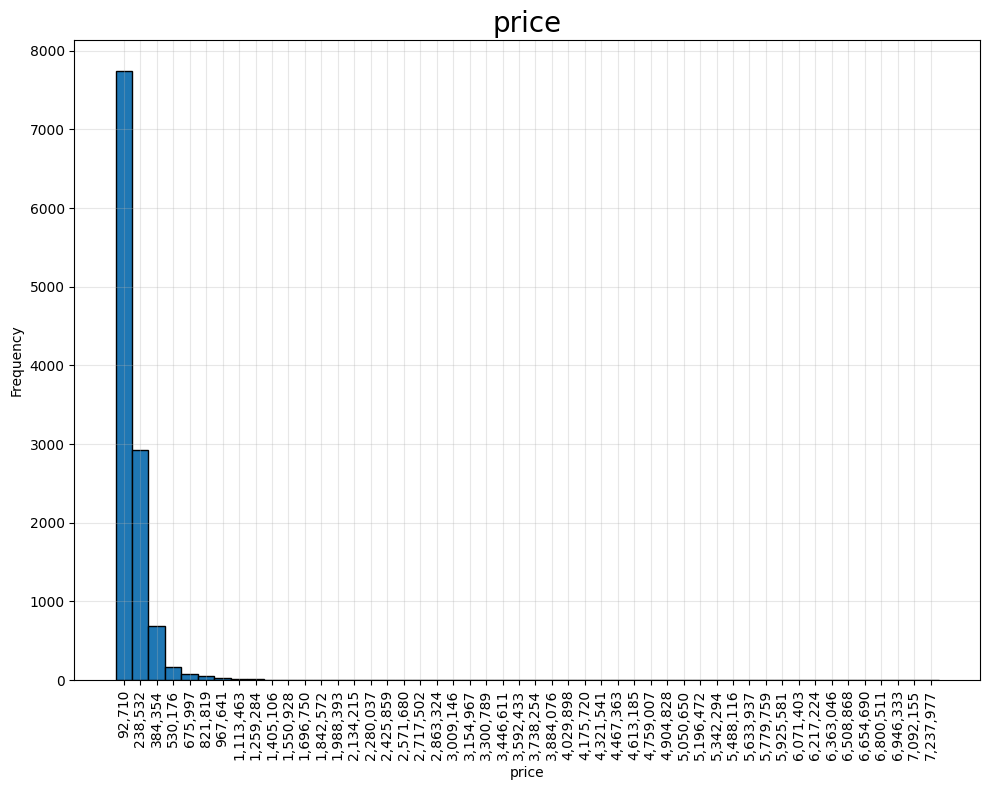

In [367]:
hist_col('price')

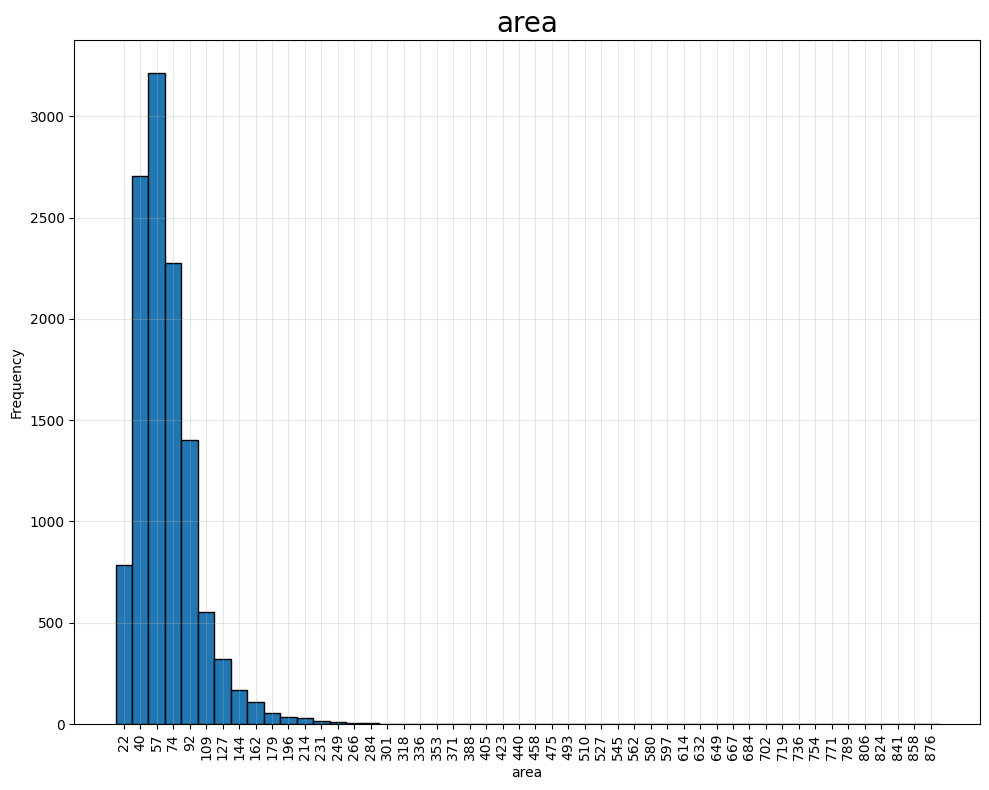

In [368]:
hist_col('area')

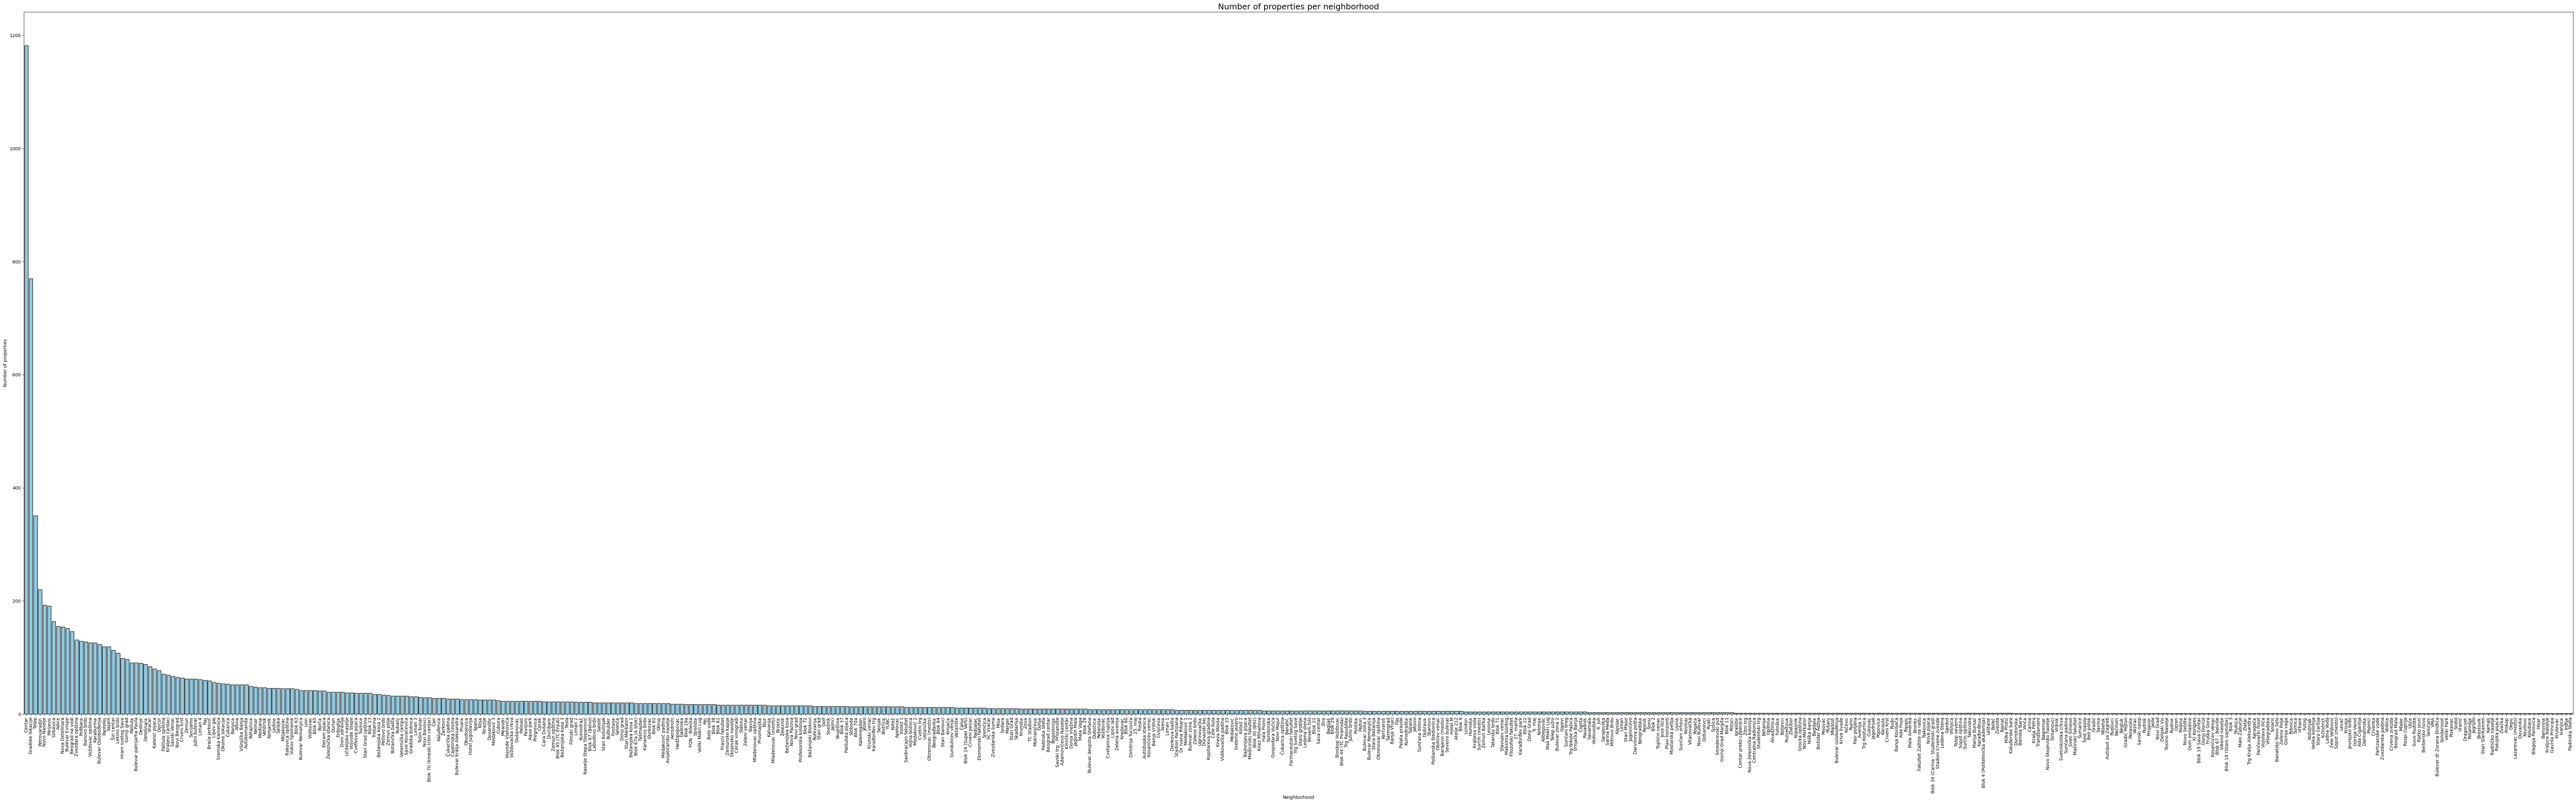

In [369]:
neighborhood_counts = dataset['neighborhood'].value_counts()

plt.figure(figsize=(80,25))
sns.barplot(x=neighborhood_counts.index, y=neighborhood_counts.values, color='skyblue', edgecolor='black')

plt.xticks(rotation=90)
plt.title('Number of properties per neighborhood', fontsize=18)
plt.ylabel('Number of properties')
plt.xlabel('Neighborhood')

plt.tight_layout()
plt.show()

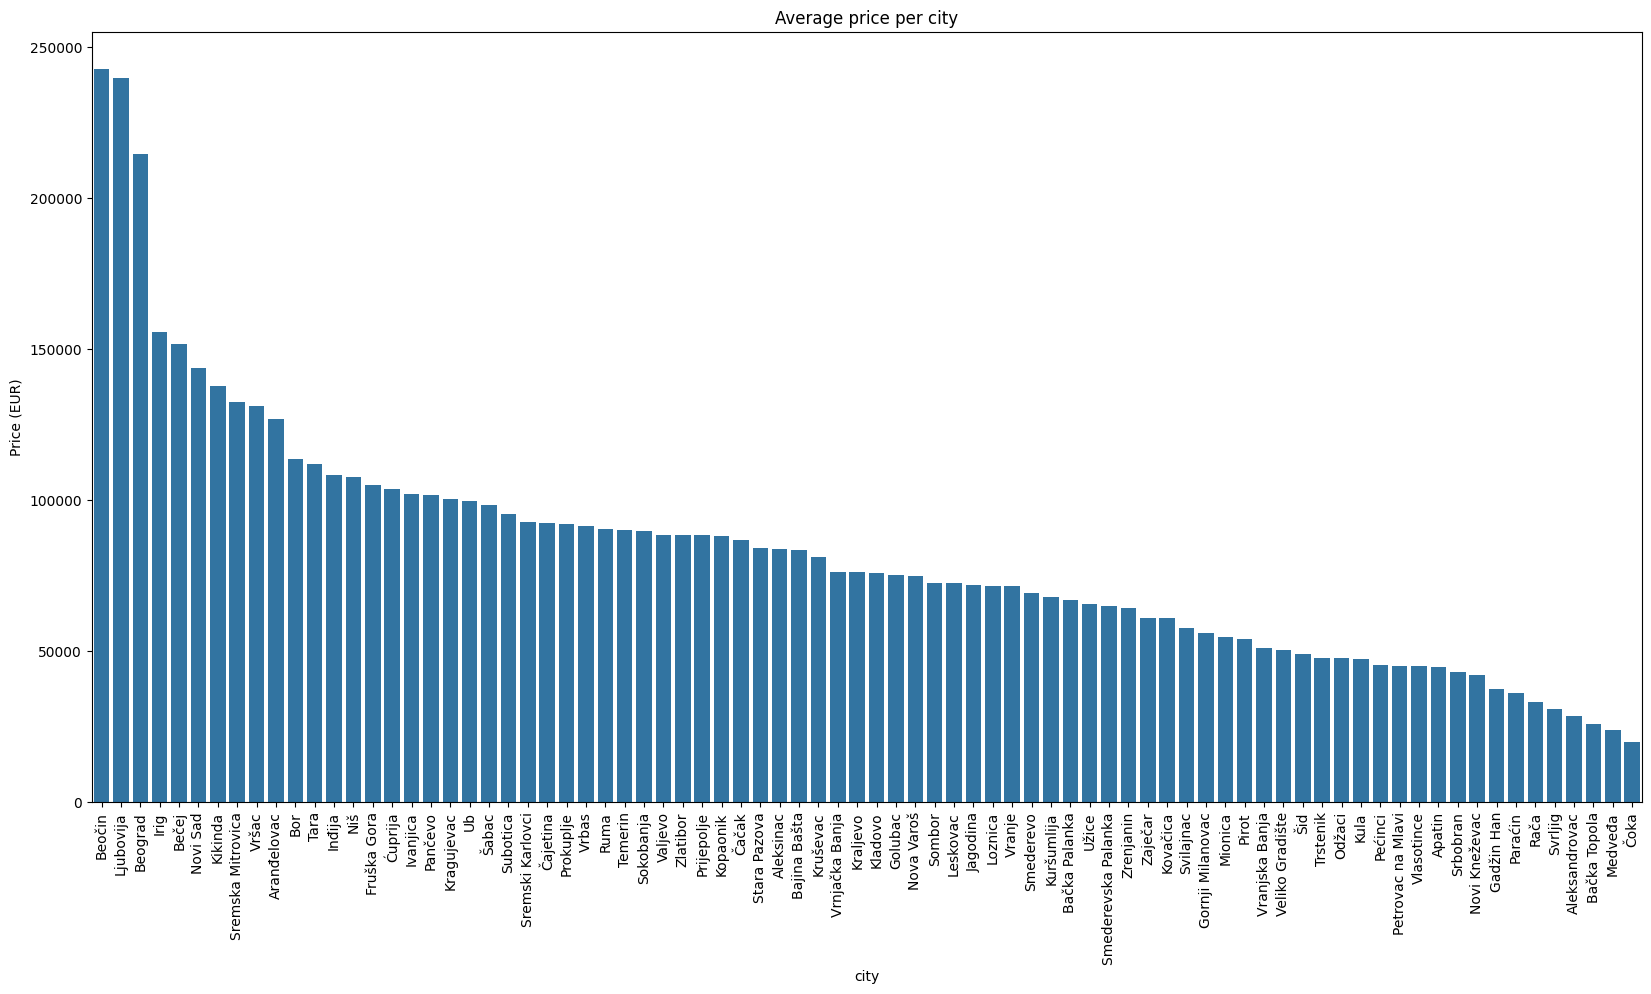

In [370]:
avg_price_by_city = dataset.groupby('city')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(20,10))
sns.barplot(x=avg_price_by_city.index, y=avg_price_by_city.values)
plt.xticks(rotation=90)
plt.title('Average price per city')
plt.ylabel('Price (EUR)')
plt.show()

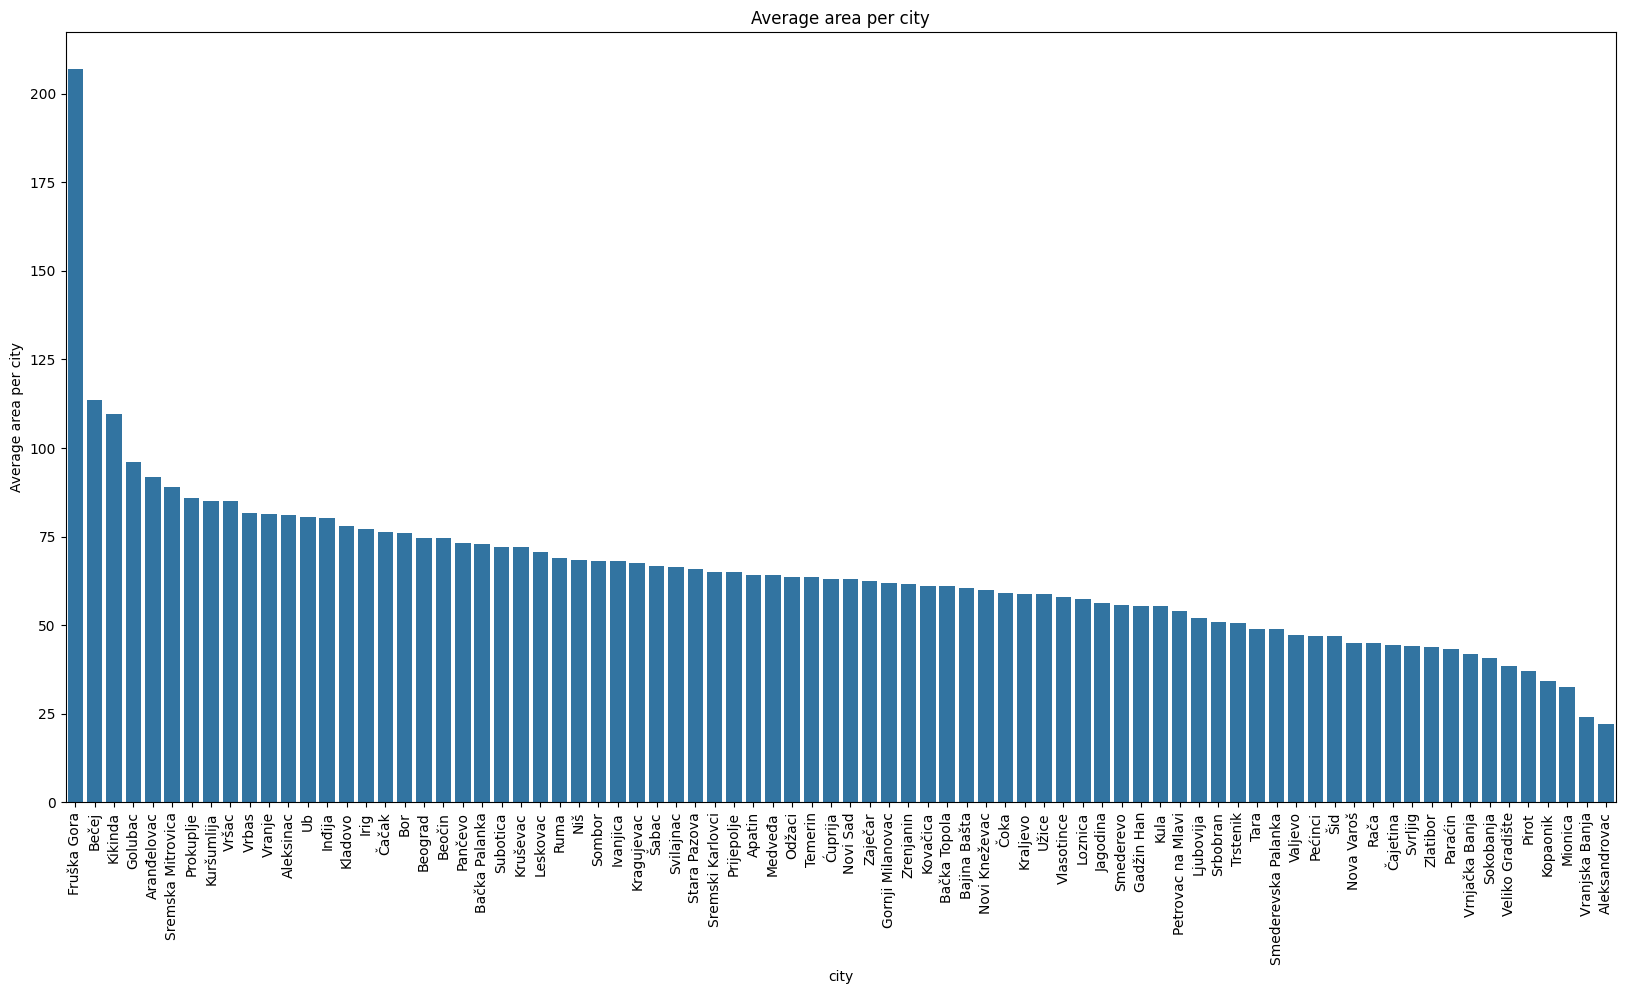

In [371]:
plt.figure(figsize=(20,10))
avg_price_city = dataset.groupby("city")["area"].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_city.index, y=avg_price_city.values)
plt.xticks(rotation=90)
plt.ylabel("Average area per city")
plt.title("Average area per city")
plt.show()

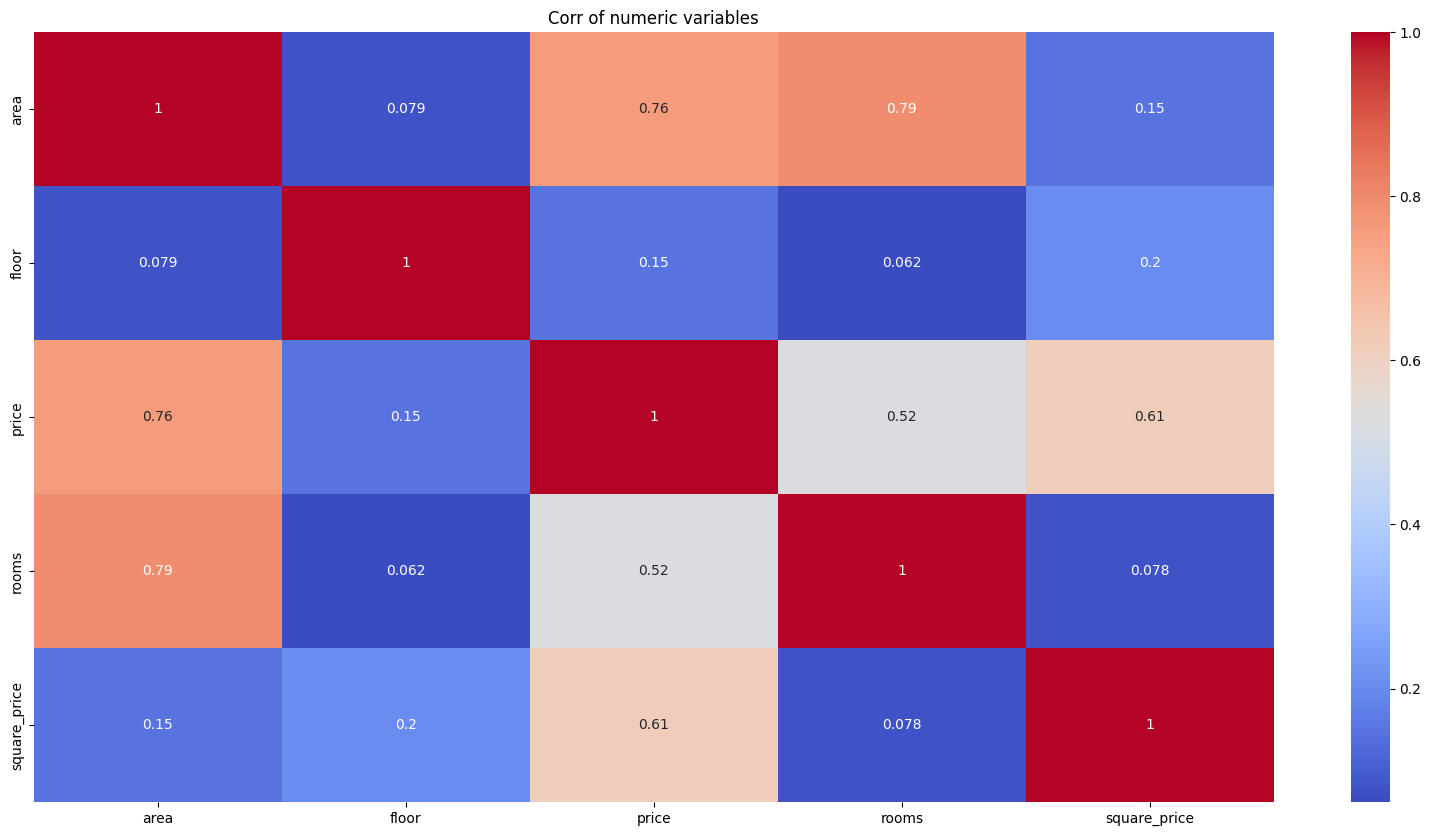

In [372]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Corr of numeric variables")
plt.show()

In [373]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import numpy as np

In [374]:
df_pca = df.copy()

df_pca['price_category'] = pd.qcut(df_pca['price'], q=3, labels=['cheap', 'medium', 'expensive'])

X = df_pca[['area', 'floor', 'rooms', 'square_price']]

y = df_pca['price_category']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [375]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.46147691 0.28789605]


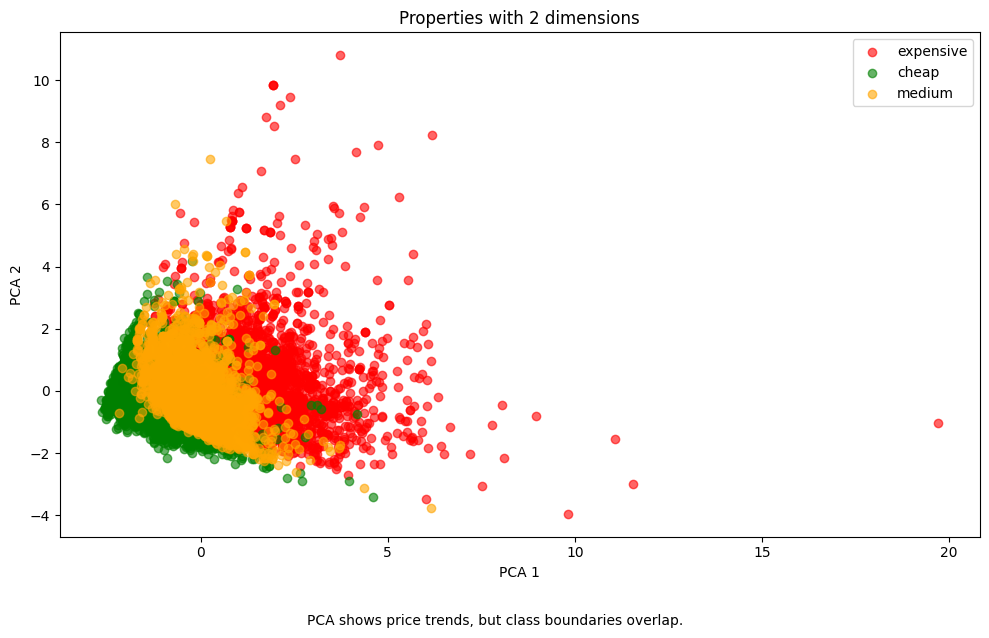

In [376]:
plt.figure(figsize=(10,6))
colors = {'cheap':'green', 'medium':'orange', 'expensive':'red'}

for cat in y.unique():
    subset = X_pca[y==cat]
    plt.scatter(subset[:,0], subset[:,1], c=colors[cat], label=cat, alpha=0.6)

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Properties with 2 dimensions')
plt.legend()

plt.figtext(0.5, -0.05,
            "PCA shows price trends, but class boundaries overlap.", 
            ha="center", fontsize=10, wrap=True)

plt.tight_layout()
plt.show()

In [377]:
categorical_cols = ["city", "municipality", "neighborhood"]
numerical_cols = ["area", "floor", "rooms"]

In [378]:
df = dataset

X = df[categorical_cols + numerical_cols]
y = df["price"]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ],
    remainder='passthrough',
    force_int_remainder_cols=False
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=200, random_state=42))
])

In [379]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['city', 'municipality',
                                                   'neighborhood'])])),
                ('regressor',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

In [380]:
print('Comparison RandomForest-a i MLP')

y_pred_rf = model.predict(X_test)
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor_nn = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ],
    remainder='drop'
)

nn_model = Pipeline(steps=[
    ('preprocessor', preprocessor_nn),
    ('regressor', MLPRegressor(hidden_layer_sizes=(200,100),
             activation='relu',
             solver='adam',
             max_iter=5000,
             early_stopping=True,
             random_state=42))
])

nn_model.fit(X_train, y_train)

y_pred_nn = nn_model.predict(X_test)

print("Neural Network RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_nn)))
print("Neural Network R2:", r2_score(y_test, y_pred_nn))

Comparison RandomForest-a i MLP
Random Forest RMSE: 49715.15351669558
Random Forest R2: 0.7922023565837054
Neural Network RMSE: 54095.14488522512
Neural Network R2: 0.7539747821632982


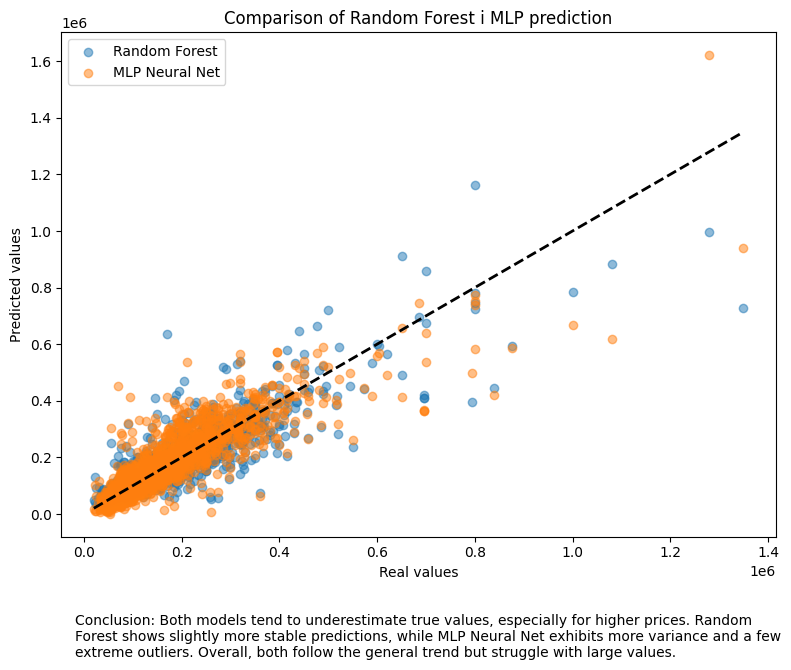

In [381]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest')
plt.scatter(y_test, y_pred_nn, alpha=0.5, label='MLP Neural Net')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('Comparison of Random Forest i MLP prediction')
plt.legend()

plt.figtext(0.1, -0.1,
            "Conclusion: Both models tend to underestimate true values, especially for higher prices. "
            "Random Forest shows slightly more stable predictions, while MLP Neural Net exhibits more variance "
            "and a few extreme outliers. Overall, both follow the general trend but struggle with large values.",
            wrap=True, ha='left', fontsize=10)

plt.tight_layout()
plt.show()


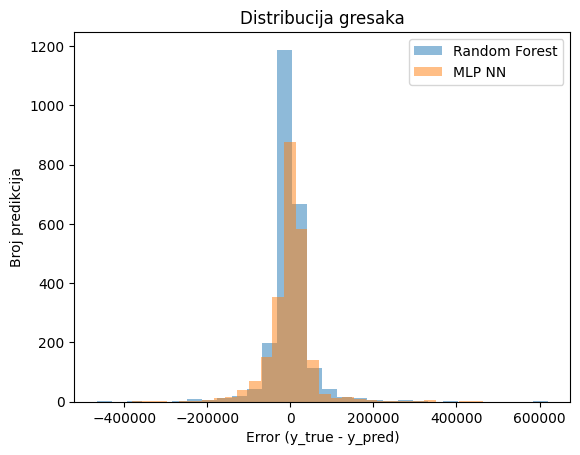

In [382]:
residual_rf = y_test - y_pred_rf
residual_nn = y_test - y_pred_nn

plt.hist(residual_rf, bins=30, alpha=0.5, label='Random Forest')
plt.hist(residual_nn, bins=30, alpha=0.5, label='MLP NN')
plt.xlabel('Error (y_true - y_pred)')
plt.ylabel('Broj predikcija')
plt.title('Distribucija gresaka')
plt.legend()
plt.show()

In [383]:
cities = sorted(df["city"].unique())

city_dropdown = widgets.Dropdown(
    options=cities,
    description='City:',
    layout=widgets.Layout(width='300px')
)

municipality_dropdown = widgets.Dropdown(
    options=[],
    description='Municipality:',
    layout=widgets.Layout(width='300px')
)

neighborhood_dropdown = widgets.Dropdown(
    options=[],
    description='Neighborhood:',
    layout=widgets.Layout(width='300px')
)

def update_municipalities(change):
    city = change['new']
    municipalities = sorted(df[df['city'] == city]['municipality'].unique())
    municipality_dropdown.options = municipalities
    if municipalities:
        municipality_dropdown.value = municipalities[0]
update_municipalities({'new': cities[0]})
city_dropdown.observe(update_municipalities, names='value')

def update_neighborhoods(change):
    city = city_dropdown.value
    municipality = change['new']
    neighborhoods = sorted(df[(df['city'] == city) & (df['municipality'] == municipality)]['neighborhood'].unique())
    neighborhood_dropdown.options = neighborhoods
    if neighborhoods:
        neighborhood_dropdown.value = neighborhoods[0]
update_neighborhoods({'new': municipality_dropdown.value})
municipality_dropdown.observe(update_neighborhoods, names='value')

display(city_dropdown, municipality_dropdown, neighborhood_dropdown)

Dropdown(description='City:', layout=Layout(width='300px'), options=('Aleksandrovac', 'Aleksinac', 'Apatin', '…

Dropdown(description='Municipality:', layout=Layout(width='300px'), options=('Gradska lokacija',), value='Grad…

Dropdown(description='Neighborhood:', layout=Layout(width='300px'), options=('Centar',), value='Centar')

In [384]:
area_input = widgets.FloatText(
    description='Area (m²):',
    value=50,
    layout=widgets.Layout(width='300px')
)

floor_input = widgets.FloatText(
    description='Floor:',
    value=2,
    layout=widgets.Layout(width='300px')
)

rooms_input = widgets.FloatText(
    description='Rooms:',
    value=2,
    layout=widgets.Layout(width='300px')
)

In [385]:
predict_button = widgets.Button(
    description="Predict Price",
    button_style='success',
    layout=widgets.Layout(width='300px')
)

output = widgets.Output()

def predict_price(b):
    with output:
        clear_output()
        user_input = pd.DataFrame([{
            "city": city_dropdown.value,
            "municipality": municipality_dropdown.value,
            "neighborhood": neighborhood_dropdown.value,
            "area": area_input.value,
            "floor": floor_input.value,
            "rooms": rooms_input.value
        }])
        price = model.predict(user_input)[0]
        print(f"Estimated property price: {round(price):,.0f} €".replace(',', '.'))

predict_button.on_click(predict_price)

In [386]:
display(
    widgets.VBox([
        city_dropdown,
        municipality_dropdown,
        neighborhood_dropdown,
        area_input,
        floor_input,
        rooms_input,
        predict_button,
        output
    ])
)

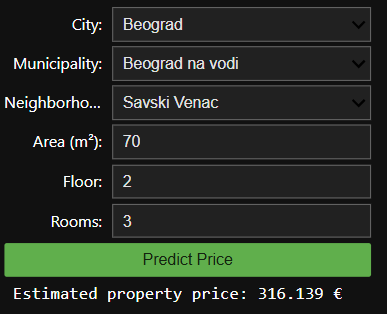

In [399]:
df['price_category'] = pd.qcut(df['price'], q=3, labels=['cheap', 'medium', 'expensive'])

              precision    recall  f1-score   support

       cheap       0.82      0.79      0.81       807
   expensive       0.83      0.85      0.84       750
      medium       0.68      0.70      0.69       784

    accuracy                           0.78      2341
   macro avg       0.78      0.78      0.78      2341
weighted avg       0.78      0.78      0.78      2341



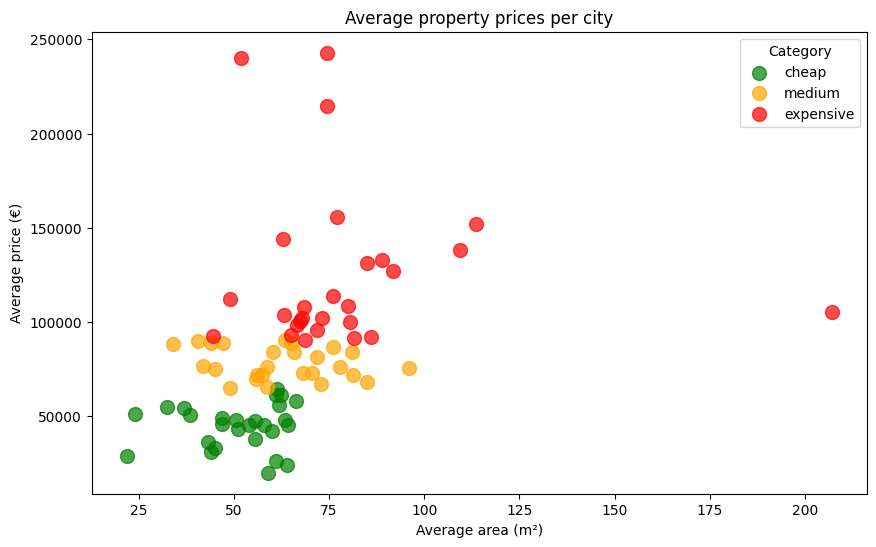

In [387]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

df = dataset

# Create 3 price categories
df['price_category'] = pd.qcut(df['price'], q=3, labels=['cheap', 'medium', 'expensive'])

X = df[['area', 'city', 'floor', 'rooms', 'municipality', 'neighborhood']]
y = df['price_category']

categorical_cols = ['city', 'municipality', 'neighborhood']
numerical_cols = ['area', 'floor', 'rooms']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols),
    ],
    remainder='passthrough'
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

city_avg = df.groupby('city')[['area', 'price']].mean().reset_index()
city_avg['price_category'] = pd.qcut(city_avg['price'], q=3, labels=['cheap', 'medium', 'expensive'])

colors = {'cheap': 'green', 'medium': 'orange', 'expensive': 'red'}

plt.figure(figsize=(10,6))
for cat in colors:
    subset = city_avg[city_avg['price_category'] == cat]
    plt.scatter(subset['area'], subset['price'], color=colors[cat], label=cat, s=100, alpha=0.7)

plt.title('Average property prices per city')
plt.xlabel('Average area (m²)')
plt.ylabel('Average price (€)')
plt.legend(title="Category")
plt.show()

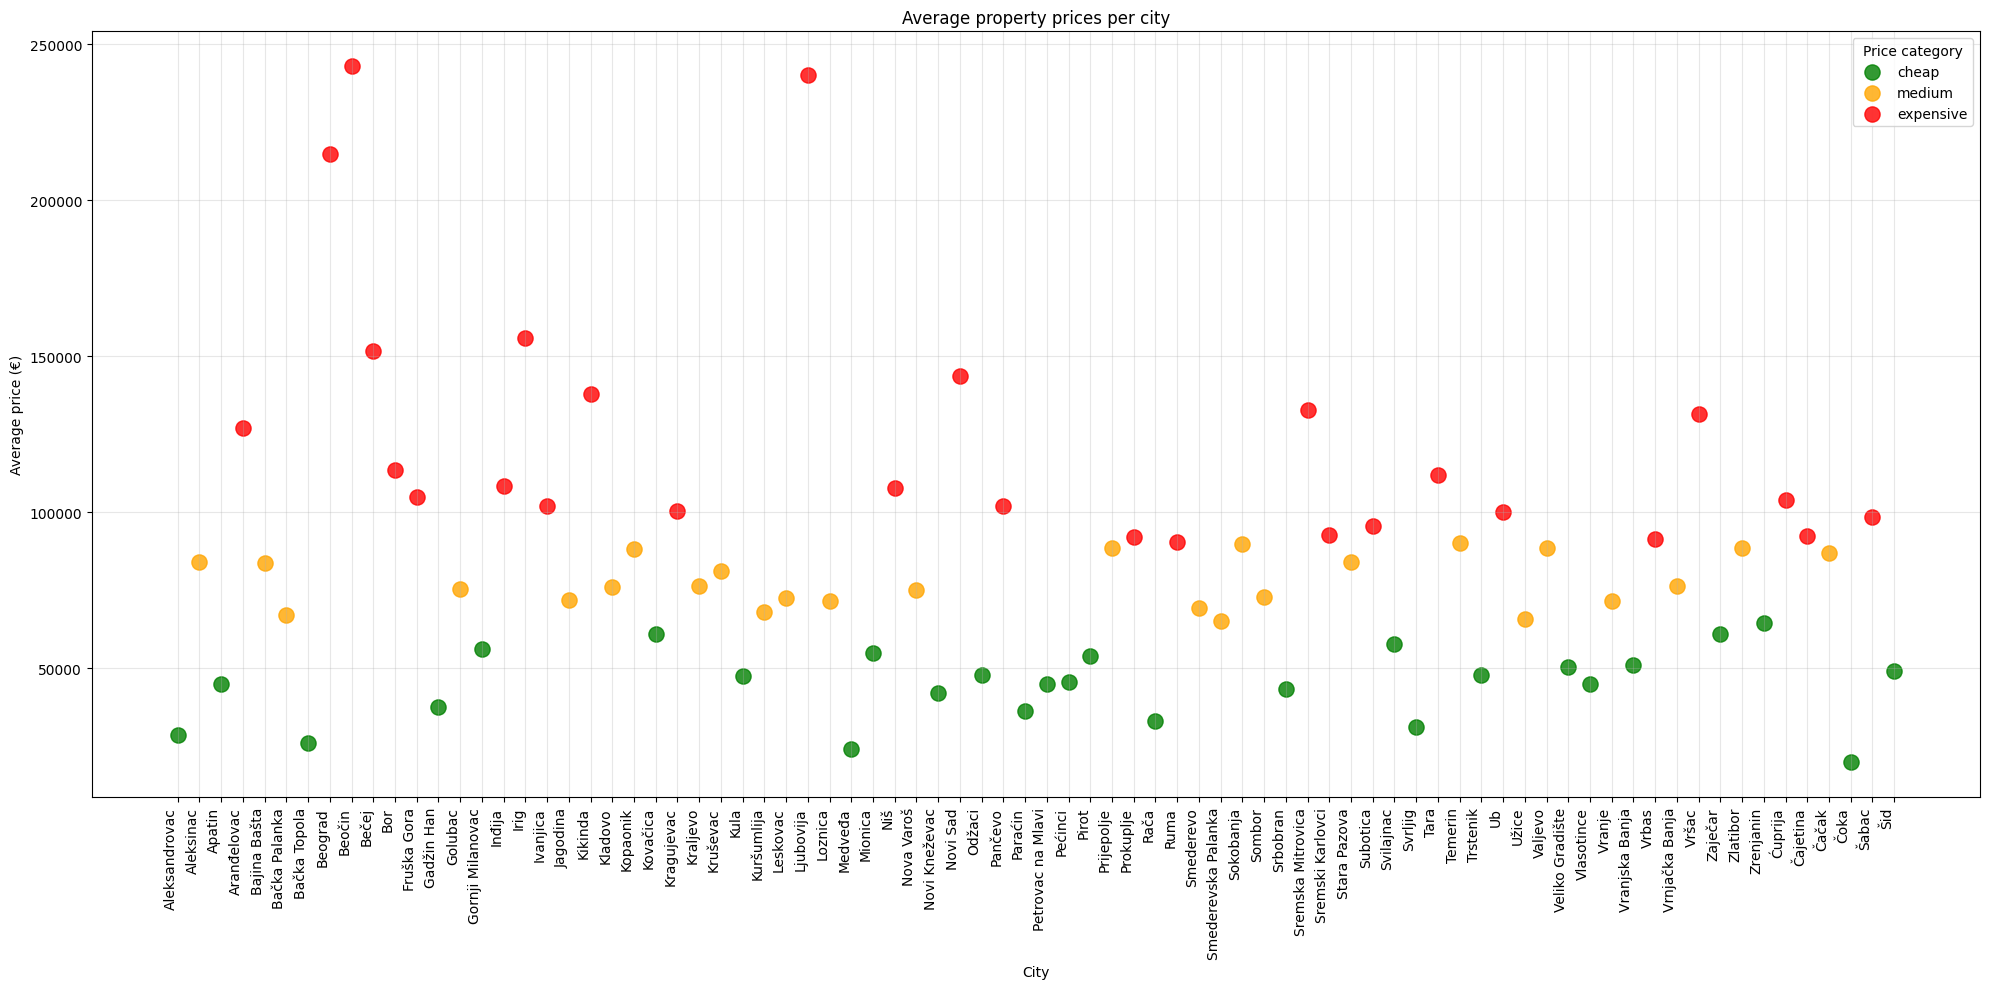

In [388]:
import matplotlib.pyplot as plt
import pandas as pd

city_avg = df.groupby('city')[['area', 'price']].mean().reset_index()
city_avg['price_category'] = pd.qcut(city_avg['price'], q=3, labels=['cheap', 'medium', 'expensive'])

colors = {'cheap': 'green', 'medium': 'orange', 'expensive': 'red'}

plt.figure(figsize=(20,10))
for cat in colors:
    subset = city_avg[city_avg['price_category'] == cat]
    plt.scatter(subset.index, subset['price'], color=colors[cat], label=cat, s=120, alpha=0.8)

plt.xticks(city_avg.index, city_avg['city'], rotation=90, ha='right')

plt.title('Average property prices per city')
plt.xlabel('City')
plt.ylabel('Average price (€)')
plt.legend(title='Price category')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [389]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

df_assoc = df.copy()
df_assoc['area_cat'] = pd.qcut(df_assoc['area'], q=3, labels=['small', 'medium', 'large'])

assoc_data = df_assoc[['city', 'area_cat', 'price_category']]

assoc_encoded = pd.get_dummies(assoc_data)

frequent_itemsets = apriori(assoc_encoded, min_support=0.05, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

filtered_rules = rules[
    rules['antecedents'].apply(lambda x: any('city_' in i for i in x) and any('area_cat_' in i for i in x))
    & rules['consequents'].apply(lambda x: any('price_category_' in i for i in x))
].sort_values(by=['lift', 'confidence'], ascending=False)

filtered_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

,antecedents,consequents,support,confidence,lift
36,"(area_cat_large, city_Beograd)",(price_category_expensive),0.173103,0.878197,2.634140
49,"(area_cat_medium, city_Novi Sad)",(price_category_medium),0.063653,0.719112,2.163065
43,"(area_cat_small, city_Novi Sad)",(price_category_cheap),0.066815,0.634740,1.899514
18,"(area_cat_small, city_Beograd)",(price_category_cheap),0.062372,0.503448,1.506612
28,"(area_cat_medium, city_Beograd)",(price_category_medium),0.074163,0.466416,1.402964
32,"(area_cat_medium, city_Beograd)",(price_category_expensive),0.066900,0.420742,1.262009
22,"(area_cat_small, city_Beograd)",(price_category_medium),0.051350,0.414483,1.246751


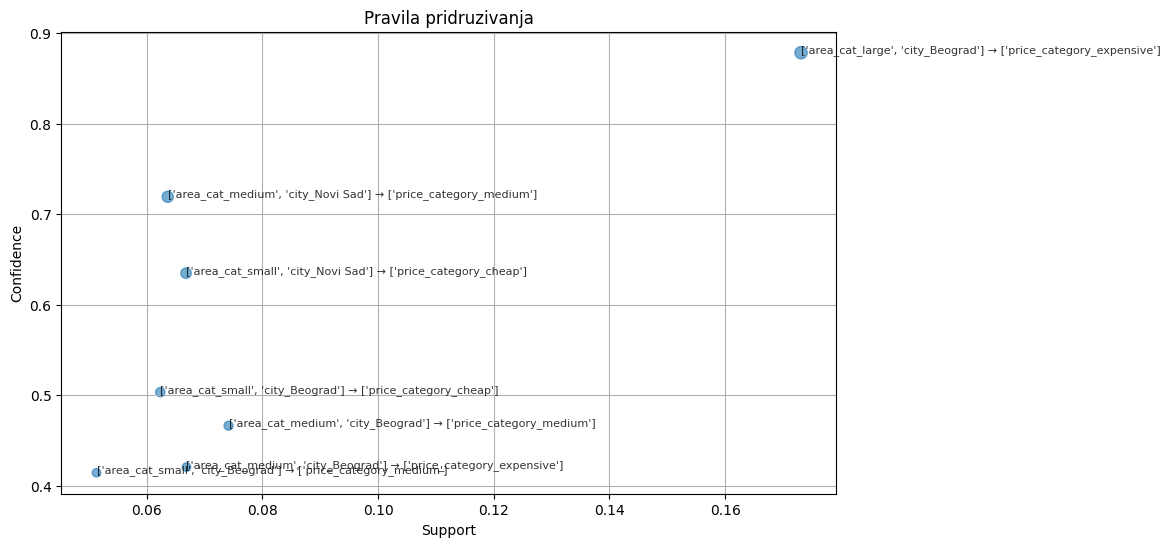

In [390]:
import matplotlib.pyplot as plt

top_rules = filtered_rules

plt.figure(figsize=(10, 6))
plt.scatter(top_rules['support'], top_rules['confidence'], 
            s=top_rules['lift'] * 30, alpha=0.6)

for i, rule in enumerate(top_rules.index):
    plt.text(top_rules['support'].iloc[i], top_rules['confidence'].iloc[i],
             f"{list(top_rules['antecedents'].iloc[i])} → {list(top_rules['consequents'].iloc[i])}",
             fontsize=8, alpha=0.8)

plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Pravila pridruzivanja')
plt.grid(True)
plt.show()

In [391]:
dataset.head()

,area,city,floor,price,rooms,square_price,municipality,neighborhood,price_category
0,76,Beograd,3.0,290000,2.0,3816,Opština Vračar,Hram svetog Save,expensive
1,41,Vrnjačka Banja,2.0,82000,2.0,2000,Gradska lokacija,Raj,cheap
2,37,Sokobanja,1.0,60605,2.0,1650,Gradska lokacija,Banjica,cheap
3,34,Sokobanja,3.0,59488,1.5,1760,Gradska lokacija,Banjica,cheap
4,55,Beograd,2.0,104500,2.0,1900,Opština Zemun,Altina,medium


In [392]:
dataset.drop('price_category', axis=1, inplace=True)

In [393]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       cheap       0.98      0.97      0.98       994
   expensive       0.97      0.98      0.98       947
      medium       0.97      0.97      0.97       985

    accuracy                           0.97      2926
   macro avg       0.97      0.97      0.97      2926
weighted avg       0.97      0.97      0.97      2926



In [394]:
dataset.head()

,area,city,floor,price,rooms,square_price,municipality,neighborhood
0,76,Beograd,3.0,290000,2.0,3816,Opština Vračar,Hram svetog Save
1,41,Vrnjačka Banja,2.0,82000,2.0,2000,Gradska lokacija,Raj
2,37,Sokobanja,1.0,60605,2.0,1650,Gradska lokacija,Banjica
3,34,Sokobanja,3.0,59488,1.5,1760,Gradska lokacija,Banjica
4,55,Beograd,2.0,104500,2.0,1900,Opština Zemun,Altina


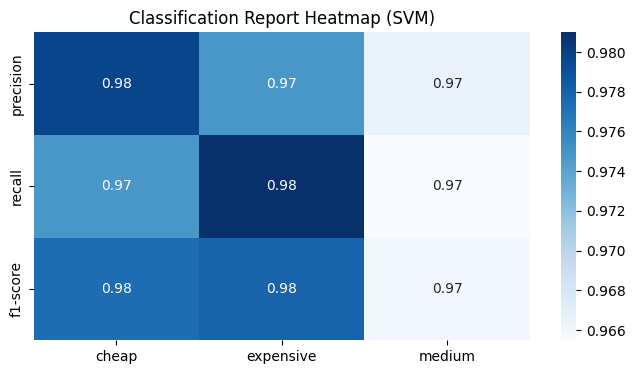

In [395]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd

report_dict = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report_dict).iloc[:-1, :3]

plt.figure(figsize=(8,4))
sns.heatmap(report_df, annot=True, cmap='Blues', fmt=".2f")
plt.title("Classification Report Heatmap (SVM)")
plt.show()

In [396]:
dataset

,area,city,floor,price,rooms,square_price,municipality,neighborhood
0,76,Beograd,3.0,290000,2.0,3816,Opština Vračar,Hram svetog Save
1,41,Vrnjačka Banja,2.0,82000,2.0,2000,Gradska lokacija,Raj
2,37,Sokobanja,1.0,60605,2.0,1650,Gradska lokacija,Banjica
3,34,Sokobanja,3.0,59488,1.5,1760,Gradska lokacija,Banjica
4,55,Beograd,2.0,104500,2.0,1900,Opština Zemun,Altina
...,...,...,...,...,...,...,...,...
11699,49,Beograd,1.0,105000,2.5,2143,Zvezdara opština,Zvezdara opština
11700,39,Beograd,1.0,105000,1.0,2692,Gornji Grad,Zemun
11701,81,Beograd,2.0,279449,3.5,3450,Crveni Krst Vračar,Vračar
11702,92,Beograd,4.0,315254,3.5,3427,Crveni Krst Vračar,Vračar


In [404]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report

data = dataset

X = data.drop(columns=["price_category"])
y = data["price_category"]

numeric_features = ["area", "floor", "price", "rooms", "square_price"]
categorical_features = ["city", "municipality", "neighborhood"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

svm_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", SVC(kernel="rbf"))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
svm_pipeline.fit(X_train, y_train)

y_pred = svm_pipeline.predict(X_test)
print("Model performance:\n")
print(classification_report(y_test, y_pred))

Model performance:

              precision    recall  f1-score   support

       cheap       0.97      0.96      0.96       994
   expensive       0.98      0.98      0.98       947
      medium       0.94      0.95      0.94       985

    accuracy                           0.96      2926
   macro avg       0.96      0.96      0.96      2926
weighted avg       0.96      0.96      0.96      2926



In [403]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

df = dataset
df['price_category'] = pd.qcut(df['price'], q=3, labels=['cheap', 'medium', 'expensive'])

X = df[['city', 'municipality', 'neighborhood', 'area', 'floor', 'rooms']]
y = df['price_category']

categorical_cols = ['city', 'municipality', 'neighborhood']
numeric_cols = ['area', 'floor', 'rooms']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

svm_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf', probability=True))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
svm_model.fit(X_train, y_train)

city_dropdown = widgets.Dropdown(
    options=sorted(df['city'].unique()),
    description='City:'
)

def update_municipalities(*args):
    selected_city = city_dropdown.value
    municipalities = sorted(df[df['city'] == selected_city]['municipality'].unique())
    municipality_dropdown.options = municipalities
    update_neighborhoods()

def update_neighborhoods(*args):
    selected_municipality = municipality_dropdown.value
    neighborhoods = sorted(df[df['municipality'] == selected_municipality]['neighborhood'].unique())
    neighborhood_dropdown.options = neighborhoods

municipality_dropdown = widgets.Dropdown(description='Municipality:')
neighborhood_dropdown = widgets.Dropdown(description='Neighborhood:')

city_dropdown.observe(update_municipalities, 'value')
municipality_dropdown.observe(update_neighborhoods, 'value')

area_input = widgets.FloatText(description='Area (m²):')
floor_input = widgets.FloatText(description='Floor:')
rooms_input = widgets.FloatText(description='Rooms:')

predict_button = widgets.Button(
    description="Predict Price Category",
    button_style='info',
    layout=widgets.Layout(width='300px')
)

output = widgets.Output()

def predict_price_category(b):
    with output:
        clear_output()
        user_input = pd.DataFrame([{
            "city": city_dropdown.value,
            "municipality": municipality_dropdown.value,
            "neighborhood": neighborhood_dropdown.value,
            "area": area_input.value,
            "floor": floor_input.value,
            "rooms": rooms_input.value
        }])
        predicted_class = svm_model.predict(user_input)[0]
        confidence = svm_model.predict_proba(user_input).max() * 100
        print(f"Predicted category: {predicted_class.upper()}")
        print(f"Model confidence: {confidence:.2f}%")

predict_button.on_click(predict_price_category)

display(
    widgets.VBox([
        city_dropdown,
        municipality_dropdown,
        neighborhood_dropdown,
        area_input,
        floor_input,
        rooms_input,
        predict_button,
        output
    ])
)

update_municipalities()

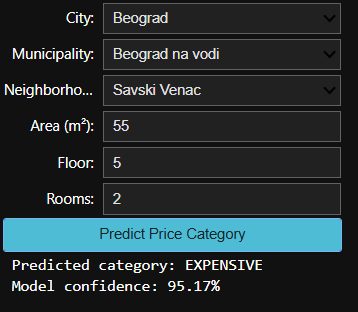